### Part 2 of Quantium Project: 

For this part of the project we will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight. 

* The trial stores are: 76,86,88. From the period of Feburary to end of April 2019.
  The trial stores are using a new chip layout that want to test the performance. 

**Select control stores** – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

**Assessment of the trial** – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

**Collate findings** – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.

This can be broken down by:

* total sales revenue
* total number of customers
* average number of transactions per customer


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats

chips_final = pd.read_csv("chips_final.csv")

In [2]:
chips_final

,Unnamed: 0,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,BRAND,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,WEIGHT_GRAMS,CHIP_BAG_SIZE,BAG_SIZE
0,0,2018-08-15,94.0,94148.0,93390.0,MIDAGE SINGLES/COUPLES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5,380.0,Invalid,Large
1,1,2019-05-14,190.0,190113.0,190914.0,OLDER FAMILIES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5,380.0,Invalid,Large
2,2,2018-08-15,49.0,49303.0,45789.0,OLDER FAMILIES,Premium,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5,380.0,Invalid,Large
3,3,2019-05-19,194.0,194308.0,194516.0,OLDER SINGLES/COUPLES,Premium,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5,380.0,Invalid,Large
4,4,2019-05-20,118.0,118021.0,120799.0,RETIREES,Mainstream,14.0,Smiths,Smiths Crnkle Chip Orgnl Big Bag 380g,380g,5.0,29.5,380.0,Invalid,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,264830,2018-11-27,195.0,195375.0,195274.0,YOUNG SINGLES/COUPLES,Premium,76.0,Woolworths,Woolworths Medium Salsa 300g,300g,1.0,1.5,300.0,Invalid,Large
264831,264831,2018-07-31,254.0,254042.0,254129.0,YOUNG SINGLES/COUPLES,Premium,35.0,Woolworths,Woolworths Mild Salsa 300g,300g,1.0,1.5,300.0,Invalid,Large
264832,264832,2019-01-30,254.0,254215.0,254303.0,YOUNG SINGLES/COUPLES,Premium,76.0,Woolworths,Woolworths Medium Salsa 300g,300g,1.0,1.5,300.0,Invalid,Large
264833,264833,2019-03-30,265.0,265111.0,263428.0,YOUNG SINGLES/COUPLES,Premium,35.0,Woolworths,Woolworths Mild Salsa 300g,300g,1.0,1.5,300.0,Invalid,Large


In [8]:
#removed a column created in error
chips_final = chips_final.drop("CHIP_BAG_SIZE", axis=1)

In [10]:
#removed old index 
chips_final = chips_final.drop("Unnamed: 0", axis=1)

In [12]:
chips_final.to_csv("chips_final.csv")

In [15]:
chips_final["SHORT_DATE"].dtype

dtype('O')

In [20]:
#first lets create a month and year column 

chips_final["SHORT_DATE"] = pd.to_datetime(chips_final["SHORT_DATE"])
chips_final["MONTH_YEAR"] = chips_final["SHORT_DATE"].dt.strftime("%m/%Y")

chips_final["MONTH_YEAR"]

0         08/2018
1         05/2019
2         08/2018
3         05/2019
4         05/2019
           ...   
264830    11/2018
264831    07/2018
264832    01/2019
264833    03/2019
264834    12/2018
Name: MONTH_YEAR, Length: 264835, dtype: object

In [33]:
#now we want to find comparable stores. I will isolate the timeframe from July 2018 to January 31st 2019 
#to find comparison stores

chips_final["MONTH_YEAR"] = pd.to_datetime(chips_final["MONTH_YEAR"])
chips_before = chips_final[(chips_final["MONTH_YEAR"] >= "07/2018") & (chips_final["MONTH_YEAR"] <= "01/2019")]

chips_before["MONTH_YEAR"].value_counts()

2018-12-01    22836
2018-07-01    22562
2018-08-01    22410
2018-10-01    22288
2019-01-01    22161
2018-11-01    21852
2018-09-01    21743
Name: MONTH_YEAR, dtype: int64

In [48]:
#grouping by store number and month year
chips_grp_before = chips_before.groupby(["STORE_NBR", "MONTH_YEAR"])

total_grp = chips_grp_before["TOT_SALES"].sum()

total_grp

STORE_NBR  MONTH_YEAR
1.0        2018-07-01    206.9
           2018-08-01    176.1
           2018-09-01    278.8
           2018-10-01    188.1
           2018-11-01    192.6
                         ...  
272.0      2018-09-01    304.7
           2018-10-01    430.6
           2018-11-01    376.2
           2018-12-01    403.9
           2019-01-01    423.0
Name: TOT_SALES, Length: 1848, dtype: float64

In [49]:
#looking at total sales by store number
chips_grp_sales = chips_before.groupby("STORE_NBR")

total_sales = chips_grp_sales["TOT_SALES"].sum()

total_sales

STORE_NBR
1.0      1386.90
2.0      1128.50
3.0      7526.15
4.0      9127.00
5.0      5739.70
          ...   
268.0    1549.05
269.0    6664.50
270.0    6697.95
271.0    5765.10
272.0    2744.35
Name: TOT_SALES, Length: 271, dtype: float64

In [194]:
#looking for total sales in trial stores 
trial_store = total_sales[77:88]

trial_store

STORE_NBR
77.0    1699.00
78.0    5466.40
79.0    7143.15
80.0    6953.40
81.0    8260.30
82.0    2289.90
83.0    5739.80
84.0    3238.50
85.0      13.90
86.0    6119.85
87.0    2385.50
88.0    9383.60
Name: TOT_SALES, dtype: float64

**Total Sales for trial stores between July 2018 and January 2019**
* Store 77: 1699.00 
* Store 86: 6119.85
* Store 88: 9383.60 

Now since we have the total sales for the trial stores. Lets look for matching control stores for each. 
There are 272 stores. I will use 2 methods to determine a control store. I will first go by total sales to find stores with similar total sales during this period. Then I will use the Pearsons correlation test to determine how correlated the 2 stores are. 

In [211]:
#sorting stores by total sales looking for a match for store 77. 
total_sorted = total_sales.sort_values(ascending = True)

total_sorted.iloc[63:73]

STORE_NBR
53.0     1611.1
6.0      1618.8
255.0    1636.6
233.0    1659.8
188.0    1683.5
77.0     1699.0
187.0    1702.2
90.0     1736.4
46.0     1758.0
220.0    1788.6
Name: TOT_SALES, dtype: float64

In [212]:
#isolating the 10 stores 
stores_control_one = [6,46,53,77,90,187,188,220,233,255]

control_one = pd.DataFrame({'Value': total_grp[stores_control_one]})

print(control_one)

                      Value
STORE_NBR MONTH_YEAR       
6.0       2018-07-01  260.0
          2018-08-01  203.2
          2018-09-01  207.7
          2018-10-01  292.4
          2018-11-01  255.3
...                     ...
255.0     2018-09-01  227.7
          2018-10-01  235.6
          2018-11-01  253.2
          2018-12-01  262.4
          2019-01-01  231.7

[70 rows x 1 columns]


In [213]:
#putting the 10 in a pivot chart format
pivot_chips1 = control_one.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "Value"  )

pivot_chips1

STORE_NBR,6.0,46.0,53.0,77.0,90.0,187.0,188.0,220.0,233.0,255.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,260.0,253.0,229.8,296.8,235.4,253.9,234.4,244.1,290.7,254.1
2018-08-01,203.2,240.7,255.1,255.5,224.5,214.3,210.3,275.0,285.9,171.9
2018-09-01,207.7,233.0,188.0,225.2,162.4,276.1,280.8,219.3,228.6,227.7
2018-10-01,292.4,275.1,238.9,204.5,319.4,181.4,246.3,293.4,185.7,235.6
2018-11-01,255.3,273.1,223.8,245.3,226.2,327.9,236.8,290.7,211.6,253.2
2018-12-01,209.1,306.9,302.6,267.3,262.7,264.4,266.8,227.4,279.8,262.4
2019-01-01,191.1,176.2,172.9,204.4,305.8,184.2,208.1,238.7,177.5,231.7


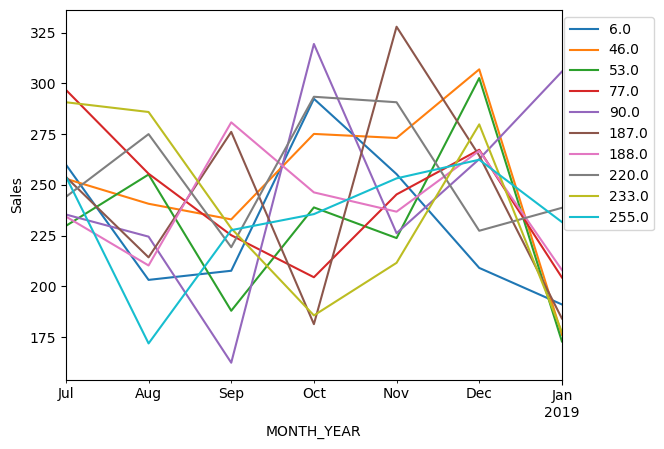

In [214]:
pivot_chips1.plot()
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.ylabel("Sales")
plt.show()

Wow thats an ugly looking line chart. I can see the red line and possible the muddish yellow store 233 might be a match but lets take a closer look at the correlations between them and rechart just the two. 

In [215]:
#looking at correlation
pivot_chips1.corr(method="pearson")

STORE_NBR,6.0,46.0,53.0,77.0,90.0,187.0,188.0,220.0,233.0,255.0
STORE_NBR,,,,,,,,,,
6.0,1.000000,0.484580,0.139538,0.042490,0.288923,0.041493,0.115455,0.641903,-0.176677,0.363013
46.0,0.484580,1.000000,0.838008,0.435650,-0.038130,0.433520,0.527886,0.239256,0.401329,0.402832
53.0,0.139538,0.838008,1.000000,0.532764,0.112228,0.125959,0.199495,0.133959,0.625439,0.101587
77.0,0.042490,0.435650,0.532764,1.000000,-0.377649,0.460669,0.042708,-0.183091,0.903774,0.191091
90.0,0.288923,-0.038130,0.112228,-0.377649,1.000000,-0.681605,-0.422287,0.341478,-0.453268,0.177864
187.0,0.041493,0.433520,0.125959,0.460669,-0.681605,1.000000,0.457048,-0.086637,0.280566,0.421864
188.0,0.115455,0.527886,0.199495,0.042708,-0.422287,0.457048,1.000000,-0.422733,0.090490,0.461834
220.0,0.641903,0.239256,0.133959,-0.183091,0.341478,-0.086637,-0.422733,1.000000,-0.271433,-0.223507
233.0,-0.176677,0.401329,0.625439,0.903774,-0.453268,0.280566,0.090490,-0.271433,1.000000,-0.128047


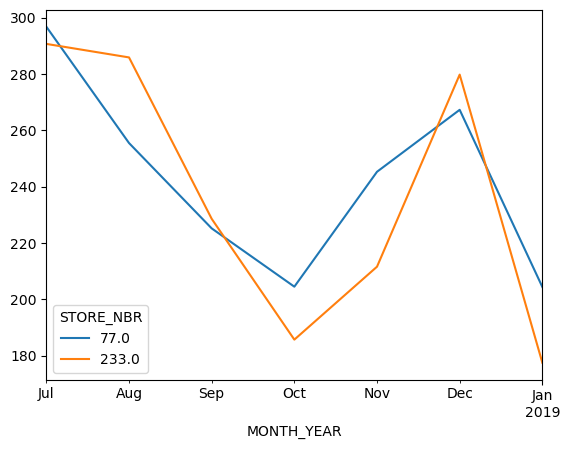

In [218]:
#clearly store 233 is the strongest correlation at .90 lets graph it 

chips1_graph =  pivot_chips1[[77,233]]

chips1_graph.plot()
plt.show()

**For trial store number 77. I will use store number 233 for a control store. Its a .90 correlation and only 40 dollar difference between the stores.** 

|Trial           | Total Sales |    Control   | Total Sales|
|----------------|-------------|--------------|------------|
|Store 77        |  1699.00    |    Store 233 | 1659.80    |
|Store 86        |  6119.85    |    Store ?   |            |  
|Store 88        |  9383.60    |    Store ?   |            |



In [137]:
#looking for control store to match with store 86
total_sorted.iloc[176:186]

STORE_NBR
23.0     6098.90
48.0     6112.30
172.0    6113.40
13.0     6114.70
86.0     6119.85
196.0    6126.30
57.0     6147.40
30.0     6194.60
236.0    6197.40
105.0    6206.20
Name: TOT_SALES, dtype: float64

In [77]:
#isolating the 10 stores 
stores_control_two = [13,23,30,48,57,86,105,172,196,236]

control_two = pd.DataFrame({'Value': total_grp[stores_control_two]})

print(control_two)

                       Value
STORE_NBR MONTH_YEAR        
13.0      2018-07-01   811.8
          2018-08-01   756.9
          2018-09-01   840.0
          2018-10-01   851.0
          2018-11-01  1049.4
...                      ...
236.0     2018-09-01   864.6
          2018-10-01   879.6
          2018-11-01   705.2
          2018-12-01   987.0
          2019-01-01   838.2

[70 rows x 1 columns]


In [84]:
#putting the 10 in a pivot chart format
pivot_chips2 = control_two.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "Value"  )

pivot_chips2

STORE_NBR,13.0,23.0,30.0,48.0,57.0,86.0,105.0,172.0,196.0,236.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,811.8,890.8,879.8,929.4,839.6,892.20,928.9,820.8,876.2,952.0
2018-08-01,756.9,952.1,935.8,851.1,915.4,764.05,923.7,758.0,848.7,970.8
2018-09-01,840.0,720.8,860.6,809.8,792.8,914.60,846.6,816.4,858.4,864.6
2018-10-01,851.0,793.4,862.6,879.2,965.8,948.40,880.0,1040.8,846.0,879.6
2018-11-01,1049.4,826.0,819.0,785.4,830.0,918.00,771.4,851.4,770.2,705.2
2018-12-01,878.6,985.0,1014.0,917.2,951.0,841.20,1048.6,928.8,1007.4,987.0
2019-01-01,927.0,930.8,822.8,940.2,852.8,841.40,807.0,897.2,919.4,838.2


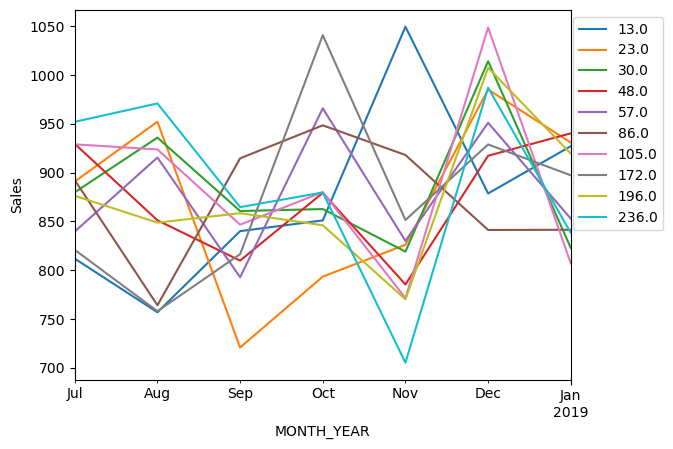

In [130]:
pivot_chips2.plot()
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.ylabel("Sales")
plt.show()

In [219]:
#looking at correlation
pivot_chips2.corr(method="pearson")

STORE_NBR,13.0,23.0,30.0,48.0,57.0,86.0,105.0,172.0,196.0,236.0
STORE_NBR,,,,,,,,,,
13.0,1.000000,-0.150189,-0.477595,-0.310142,-0.283500,0.409610,-0.563172,0.240211,-0.270657,-0.853592
23.0,-0.150189,1.000000,0.594336,0.620930,0.458281,-0.784698,0.558633,-0.115548,0.600215,0.515399
30.0,-0.477595,0.594336,1.000000,0.292305,0.599159,-0.516913,0.952586,-0.021631,0.689615,0.805425
48.0,-0.310142,0.620930,0.292305,1.000000,0.363605,-0.271147,0.479948,0.303527,0.735414,0.573430
57.0,-0.283500,0.458281,0.599159,0.363605,1.000000,-0.218110,0.603628,0.593520,0.393114,0.495600
86.0,0.409610,-0.784698,-0.516913,-0.271147,-0.218110,1.000000,-0.381464,0.524475,-0.373196,-0.520981
105.0,-0.563172,0.558633,0.952586,0.479948,0.603628,-0.381464,1.000000,0.083882,0.739672,0.888408
172.0,0.240211,-0.115548,-0.021631,0.303527,0.593520,0.524475,0.083882,1.000000,0.239403,-0.086124
196.0,-0.270657,0.600215,0.689615,0.735414,0.393114,-0.373196,0.739672,0.239403,1.000000,0.665074


Even though the graph is a bit messy with 10 stores 86 which is colored brown does not really match any of the patterns. 

Running a correlation test shows the strongest store is 0.52 store 172.

Even though these 9 are the best fit with total sales its not the best fit when it comes to sales pattern over the months. 
I will further explore for a better option.

I want to keep it as close as possible to the total sales of 6119.85. Ill grab the next 10 above by total sales. 


In [144]:
total_sorted.iloc[180:195]

STORE_NBR
86.0     6119.85
196.0    6126.30
57.0     6147.40
30.0     6194.60
236.0    6197.40
105.0    6206.20
91.0     6230.00
109.0    6238.30
97.0     6264.95
180.0    6265.70
102.0    6286.00
164.0    6289.40
155.0    6308.70
184.0    6309.00
160.0    6311.60
Name: TOT_SALES, dtype: float64

In [145]:
#capturing the next 9 above 

#isolating the 10 stores 
stores_control_three = [86,91,97,102,109,155,160,164,180,184]

control_three = pd.DataFrame({'Value': total_grp[stores_control_three]})

print(control_three)

                       Value
STORE_NBR MONTH_YEAR        
86.0      2018-07-01  892.20
          2018-08-01  764.05
          2018-09-01  914.60
          2018-10-01  948.40
          2018-11-01  918.00
...                      ...
184.0     2018-09-01  873.00
          2018-10-01  895.20
          2018-11-01  869.20
          2018-12-01  900.00
          2019-01-01  913.40

[70 rows x 1 columns]


In [146]:
#putting the 10 in a pivot chart format
pivot_chips3 = control_three.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "Value"  )

pivot_chips3

STORE_NBR,86.0,91.0,97.0,102.0,109.0,155.0,160.0,164.0,180.0,184.0
MONTH_YEAR,,,,,,,,,,
2018-07-01,892.20,827.7,848.20,782.4,884.0,924.6,894.8,853.2,816.6,983.8
2018-08-01,764.05,916.1,917.35,986.4,828.3,782.7,756.2,920.2,788.5,874.4
2018-09-01,914.60,1000.1,908.80,970.4,871.4,1014.4,915.2,841.4,911.4,873.0
2018-10-01,948.40,851.8,993.20,902.2,957.6,963.8,887.4,863.2,871.4,895.2
2018-11-01,918.00,911.2,853.40,930.0,929.6,898.8,936.0,829.6,793.4,869.2
2018-12-01,841.20,866.8,899.40,816.6,908.8,849.8,1018.4,1031.6,995.0,900.0
2019-01-01,841.40,856.3,844.60,898.0,858.6,874.6,903.6,950.2,1089.4,913.4


In [220]:
#looking at correlation
pivot_chips3.corr(method="pearson")

STORE_NBR,86.0,91.0,97.0,102.0,109.0,155.0,160.0,164.0,180.0,184.0
STORE_NBR,,,,,,,,,,
86.0,1.000000,0.019027,0.211778,-0.158172,0.788300,0.877882,0.441970,-0.624613,-0.115073,0.072641
91.0,0.019027,1.000000,0.107347,0.756611,-0.286609,0.285142,-0.124414,-0.307085,-0.157871,-0.703307
97.0,0.211778,0.107347,1.000000,0.296909,0.378689,0.214531,-0.208412,-0.034539,-0.165523,-0.373501
102.0,-0.158172,0.756611,0.296909,1.000000,-0.305346,-0.017878,-0.554953,-0.307030,-0.208742,-0.826582
109.0,0.788300,-0.286609,0.378689,-0.305346,1.000000,0.451168,0.548266,-0.219011,-0.104106,-0.037604
155.0,0.877882,0.285142,0.214531,-0.017878,0.451168,1.000000,0.325977,-0.609502,0.021320,0.074457
160.0,0.441970,-0.124414,-0.208412,-0.554953,0.548266,0.325977,1.000000,0.296822,0.476804,0.097636
164.0,-0.624613,-0.307085,-0.034539,-0.307030,-0.219011,-0.609502,0.296822,1.000000,0.635272,0.009959
180.0,-0.115073,-0.157871,-0.165523,-0.208742,-0.104106,0.021320,0.476804,0.635272,1.000000,0.057764


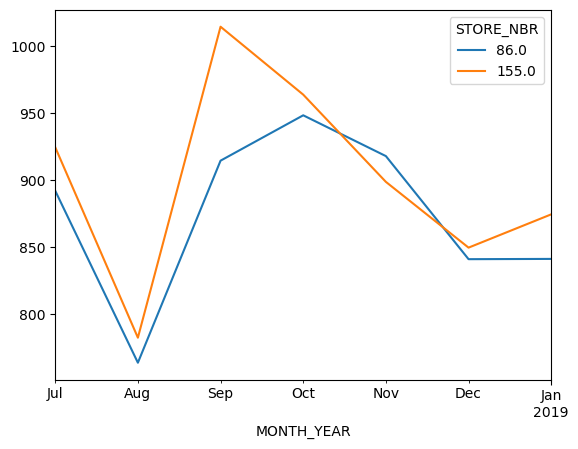

In [156]:
#store 155 is very close at an .82 correlation
store_86_155 = pivot_chips3[[86,155]]

store_86_155.plot()
plt.show()

Store number looks promising with a strong correlation of .87 but lets see how it looks like compare to the top 10. 

In [221]:
#checking correlations on entire table 
total_grp_df = pd.DataFrame(total_grp)

total_grp_pivot = total_grp_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

total_grp_pivot_table = total_grp_pivot.corr(method="pearson")

total_grp_pivot_table[86].sort_values(ascending=False).head(10)

STORE_NBR
31.0     1.000000
86.0     1.000000
155.0    0.877882
132.0    0.846517
240.0    0.825066
222.0    0.795075
109.0    0.788300
138.0    0.759864
198.0    0.748794
114.0    0.734415
Name: 86.0, dtype: float64

These are the top 10 correlations to store 86. Store 155 would be ranked in 2nd place lets look at the other stores by total sales before I make a decision. 

In [252]:
#grabbing the total sales sorted series to see how the sales stack up for the top 4 above by strongest correlation. 
total_sorted.loc[[31,240,132,155]]

STORE_NBR
31.0       14.8
240.0    2790.1
132.0     271.8
155.0    6308.7
Name: TOT_SALES, dtype: float64

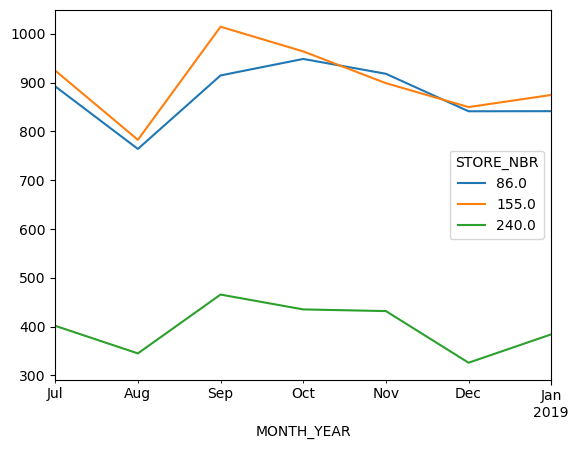

In [224]:
#store 132 sales are way too low to use. 
#grabbing store 240,155,86 from total group dataframe

three_amigos = total_grp[[86,155,240]]

#making dataframe
amigos_df = pd.DataFrame(three_amigos)

#pivoting the dataframe
amigos_pivot = amigos_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

amigos_pivot.plot()
plt.show()

Store 240 even though it has a good correlation store 155 is a much better fit. Store 31 even though is a best match correlation wise it doesnt make sense with sales volume. So I will go with store 155

|Trial           | Total Sales |    Control   | Total Sales|
|----------------|-------------|--------------|------------|
|Store 77        |  1699.00    |    Store 233 | 1659.80    |
|Store 86        |  6119.85    |    Store 155 | 6308.70    |  
|Store 88        |  9383.60    |    Store ?   |            |

In [253]:
#looking for control store for store 88
#reusing total group pivot table to find top 10 correlated stores
total_grp_pivot_table[88].sort_values(ascending=False).head(10)

STORE_NBR
88.0     1.000000
159.0    0.903186
204.0    0.885774
134.0    0.864293
1.0      0.813636
253.0    0.811838
91.0     0.776688
61.0     0.748929
178.0    0.731857
188.0    0.716752
Name: 88.0, dtype: float64

In [225]:
#looking total sales 
total_sorted.iloc[260:]

STORE_NBR
26.0      8463.40
72.0      8518.50
199.0     8654.40
40.0      8866.80
203.0     8943.70
4.0       9127.00
58.0      9178.75
165.0     9237.80
237.0     9369.00
88.0      9383.60
226.0    10239.15
Name: TOT_SALES, dtype: float64

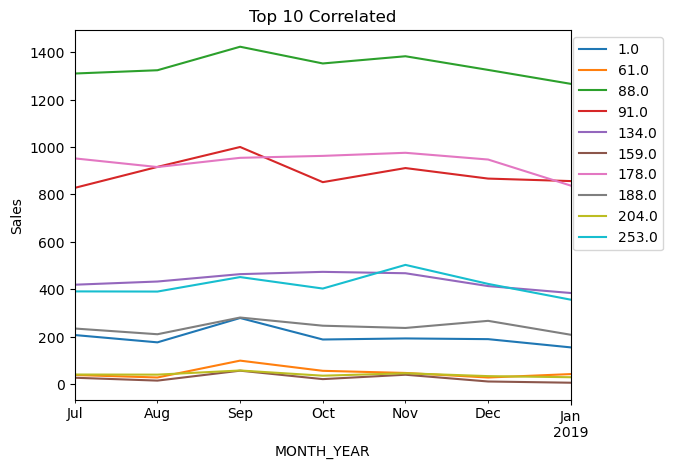

In [256]:
#none of them come close to sales amount but do match the pattern. 

chips4 = total_grp[[1,61,88,91,134,159,178,188,204,253]]

#making dataframe
chips4_df = pd.DataFrame(chips4)

#pivoting the dataframe
chips_pivot4 = chips4_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

#creating line chart
chips_pivot4.plot()
plt.title("Top 10 Correlated")
plt.ylabel("Sales")
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.show()

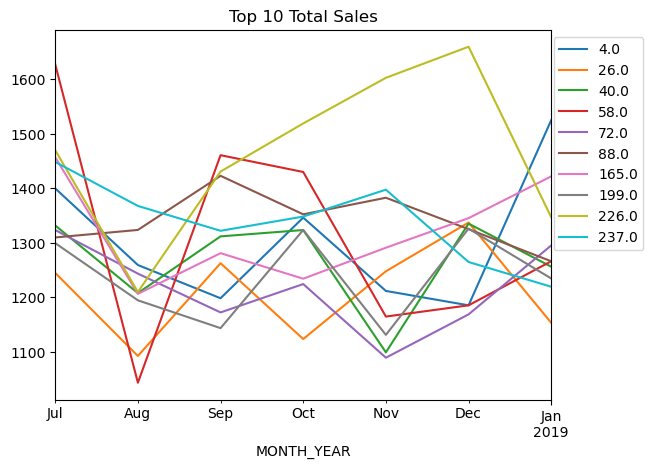

In [232]:
#lets look at the total sales top 10 

chips5 = total_grp[[4,26,40,58,72,88,165,199,226,237]]

#making dataframe
chips5_df = pd.DataFrame(chips5)

#pivoting the dataframe
chips_pivot5 = chips5_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

chips_pivot5.plot()
plt.title("Top 10 Total Sales")
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.show()

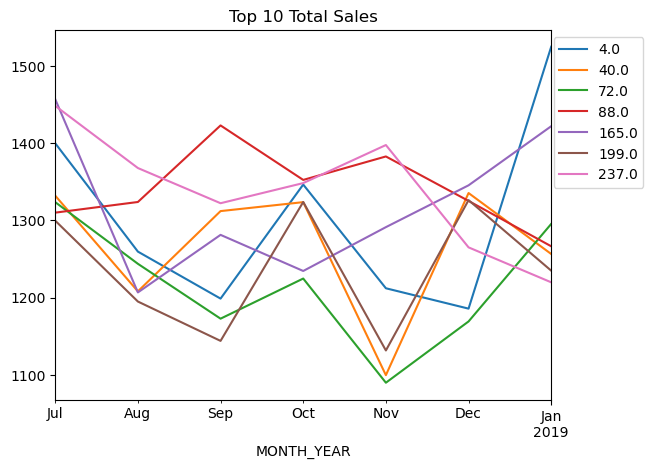

In [235]:
#decluttering: removing 3 stores to better visualize 

chips5 = total_grp[[4,40,72,88,165,199,237]]

#making dataframe
chips5_df = pd.DataFrame(chips5)

#pivoting the dataframe
chips_pivot5 = chips5_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

chips_pivot5.plot()
plt.title("Top 10 Total Sales")
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.show()

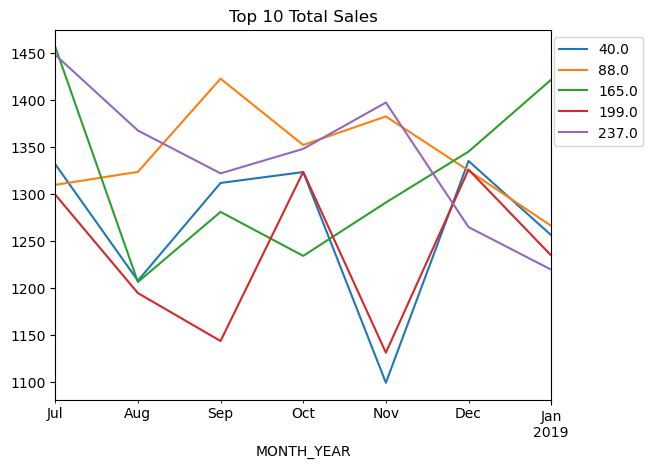

In [239]:
#decluttering: removing 2 more stores to get a better visual 

chips5 = total_grp[[40,88,165,199,237]]

#making dataframe
chips5_df = pd.DataFrame(chips5)

#pivoting the dataframe
chips_pivot5 = chips5_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

chips_pivot5.plot()
plt.title("Top 10 Total Sales")
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.show()

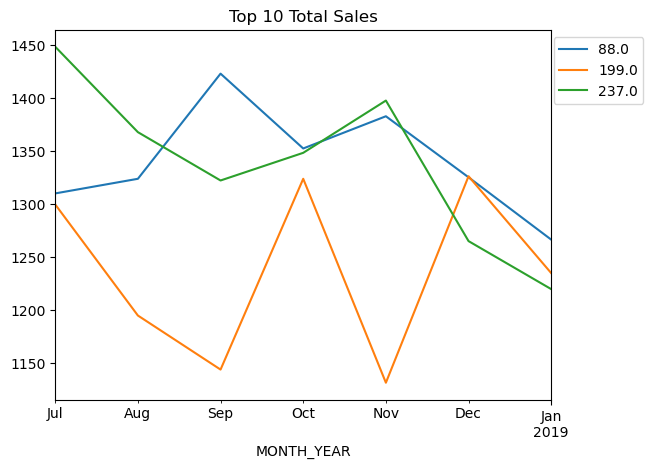

In [241]:
#decluttering: removing 2 more stores to get a better visual 

chips5 = total_grp[[88,199,237]]

#making dataframe
chips5_df = pd.DataFrame(chips5)

#pivoting the dataframe
chips_pivot5 = chips5_df.pivot_table(index="MONTH_YEAR", columns = "STORE_NBR", values = "TOT_SALES"  )

chips_pivot5.plot()
plt.title("Top 10 Total Sales")
plt.legend(loc="upper right", bbox_to_anchor=(1.20,1))
plt.show()

In [247]:
#store 237 comes close to the pattern of store 88 
sorted_88 = total_grp_pivot_table[88].sort_values(ascending=False)

sorted_88[237]

0.3084792217319044

Even though the correlation is very low at .30 this store makes the most sense by total sales. The top 10 correlated did not come close in sales amount but trends it did. 

In top 10 sales store 237 which is the closest sales wise actually fits closest when graphed. 
I will proceed with this store as the last control store. 

|Trial           | Total Sales |    Control   | Total Sales|
|----------------|-------------|--------------|------------|
|Store 77        |  1699.00    |    Store 233 | 1659.80    |
|Store 86        |  6119.85    |    Store 155 | 6308.70    |  
|Store 88        |  9383.60    |    Store 237 | 9369.00    |



#### Comparing the trial stores vs control stores

Now that I have the control stores and the trial stores its time to run some analysis on the trial sales period. 

First I will start with an overview comparing them seperatley.
I will isolate the trial periods and compare how they performed to the control stores during the same months. 
I will look at total sales, total customers, total purchases for each. 

In [257]:
#isolating trial time period
chips_trial = chips_final[(chips_final["MONTH_YEAR"] >= "02/2019") & (chips_final["MONTH_YEAR"] <= "04/2019")]

chips_trial["MONTH_YEAR"].value_counts()

2019-03-01    22592
2019-04-01    21766
2019-02-01    20405
Name: MONTH_YEAR, dtype: int64

In [260]:
#creating new df for trial and controlstores 
tstore_77 =  chips_trial[chips_trial["STORE_NBR"] == 77]
cstore_233 = chips_trial[chips_trial["STORE_NBR"] == 233]

tstore_86 =  chips_trial[chips_trial["STORE_NBR"] == 86]
cstore_155 = chips_trial[chips_trial["STORE_NBR"] == 155]

tstore_88 =  chips_trial[chips_trial["STORE_NBR"] == 88]
cstore_237 = chips_trial[chips_trial["STORE_NBR"] == 237]

tstore_77

,SHORT_DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,BRAND,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES,WEIGHT_GRAMS,BAG_SIZE,MONTH_YEAR
10271,2019-04-17,77.0,77210.0,75136.0,OLDER SINGLES/COUPLES,Budget,16.0,Smiths,Smiths Crinkle Chips Salt & Vinegar 330g,330g,2.0,11.4,330.0,Large,2019-04-01
15546,2019-02-27,77.0,77001.0,74913.0,YOUNG FAMILIES,Mainstream,7.0,Smiths,Smiths Crinkle Original 330g,330g,2.0,11.4,330.0,Large,2019-02-01
19760,2019-04-01,77.0,77121.0,75048.0,NEW FAMILIES,Budget,46.0,Kettle,Kettle Original 175g,175g,2.0,10.8,175.0,Small,2019-04-01
40132,2019-02-27,77.0,77050.0,74968.0,RETIREES,Mainstream,57.0,Old,Old El Paso Salsa Dip Tomato Mild 300g,300g,2.0,10.2,300.0,Large,2019-02-01
40133,2019-03-03,77.0,77093.0,75013.0,RETIREES,Mainstream,57.0,Old,Old El Paso Salsa Dip Tomato Mild 300g,300g,2.0,10.2,300.0,Large,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262458,2019-04-14,77.0,77466.0,75422.0,YOUNG FAMILIES,Mainstream,91.0,CCs,CCs Tasty Cheese 175g,175g,1.0,2.1,175.0,Small,2019-04-01
262586,2019-02-12,77.0,77181.0,75104.0,YOUNG SINGLES/COUPLES,Mainstream,66.0,CCs,CCs Nacho Cheese 175g,175g,1.0,2.1,175.0,Small,2019-02-01
262765,2019-02-22,77.0,77024.0,74936.0,NEW FAMILIES,Budget,27.0,WW,WW Supreme Cheese Corn Chips 200g,200g,1.0,1.9,200.0,Medium,2019-02-01
263247,2019-03-21,77.0,77359.0,75300.0,RETIREES,Premium,110.0,WW,WW Original Corn Chips 200g,200g,1.0,1.9,200.0,Medium,2019-03-01


#### Lets start with store 77 and 233 

In [266]:
#looking at total sales and products sold
tstore_77[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    777.0
PROD_QTY     234.0
dtype: float64

In [267]:
#looking at total sales and products sold
cstore_233[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    601.7
PROD_QTY     175.0
dtype: float64

In [274]:
#looking at repeat customers for trial store
tstore_77['LYLTY_CARD_NBR'].value_counts()

77045.0    2
77424.0    2
77402.0    2
77000.0    2
77466.0    2
          ..
77294.0    1
77502.0    1
77125.0    1
77120.0    1
77024.0    1
Name: LYLTY_CARD_NBR, Length: 124, dtype: int64

In [298]:
#total customer transactions
tstore_77[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    148
dtype: int64

In [295]:
#total customer transactions 
cstore_233[['LYLTY_CARD_NBR']].count()

LYLTY_CARD_NBR    121
dtype: int64

In [275]:
#looking at repeat customers for control store
cstore_233[['LYLTY_CARD_NBR']].value_counts()

LYLTY_CARD_NBR
233227.0          2
233449.0          2
233327.0          2
233111.0          2
233398.0          2
                 ..
233139.0          1
233138.0          1
233136.0          1
233135.0          1
233491.0          1
Length: 112, dtype: int64

In [294]:
#counting repeat customers that purchased more than once
repeat_customers = tstore_77['LYLTY_CARD_NBR'].value_counts()

print(repeat_customers.head(24))

repeats_total = 24

77045.0    2
77424.0    2
77402.0    2
77000.0    2
77466.0    2
77341.0    2
77389.0    2
77350.0    2
77123.0    2
77420.0    2
77450.0    2
77115.0    2
77338.0    2
77359.0    2
77462.0    2
77069.0    2
77007.0    2
77139.0    2
77482.0    2
77009.0    2
77077.0    2
77454.0    2
77206.0    2
77207.0    2
Name: LYLTY_CARD_NBR, dtype: int64


In [305]:
#counting repeat customers that purchased more than once
repeat_customers2 = cstore_233['LYLTY_CARD_NBR'].value_counts()

print(repeat_customers2.head(9))

repeats_total_two = 9 

233284.0    2
233341.0    2
233327.0    2
233186.0    2
233227.0    2
233398.0    2
233111.0    2
233071.0    2
233449.0    2
Name: LYLTY_CARD_NBR, dtype: int64


In [326]:
#grouping stores by month 
grouped77 = tstore_77.groupby('MONTH_YEAR')
grouped233 = cstore_233.groupby('MONTH_YEAR')

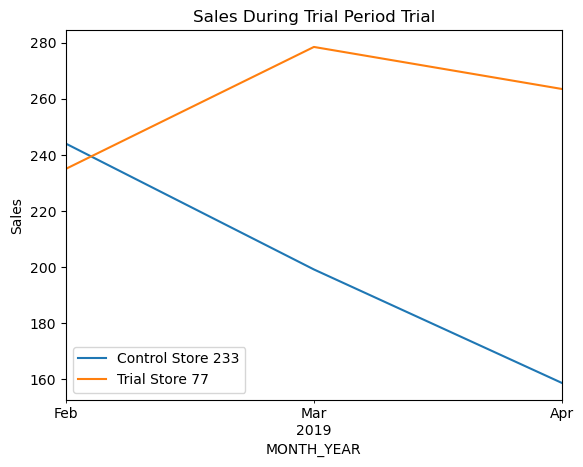

In [327]:
grouped233 = cstore_233.groupby('MONTH_YEAR')
grouped233["TOT_SALES"].sum().plot(label="Control Store 233")
grouped77["TOT_SALES"].sum().plot(label = "Trial Store 77")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales During Trial Period Trial")
plt.show()

|  Store 77 | Totals   |
|---------- |----------|
|TOT_SALES  |   777.0  |
|PROD_QTY   |   234.0  |
|REPEAT CST |   24     |
|Total  CST |   148    |

| Store 233 |          |
|-----------|----------|
|TOT_SALES  |   601.70 |
|PROD_QTY   |   175.0  |
|REPEAT CST |   9      |
|Total CST  |   121    |

For for the first pair we can see a clear difference between the trial store and the control store. Every category is higher from total sales to quantity sold, repeat customers and number of customers. 

Lets look at the next pair of stores

##### Trial Store 86 and Control Store 155:

In [330]:
#looking at total sales and products sold
tstore_86[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    2788.2
PROD_QTY      815.0
dtype: float64

In [331]:
#looking at total sales and products sold
cstore_155[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    2540.2
PROD_QTY      736.0
dtype: float64

In [337]:
#looking for repeat customers 
tstore_86["LYLTY_CARD_NBR"].value_counts()

86112.0     6
86230.0     5
86172.0     5
86075.0     5
86116.0     5
           ..
86046.0     1
86170.0     1
155311.0    1
86096.0     1
86060.0     1
Name: LYLTY_CARD_NBR, Length: 215, dtype: int64

In [338]:
#looking at total transactions
tstore_86["LYLTY_CARD_NBR"].count()

408

In [351]:
# we have 123 repeat customers for store 86
repeat_customers_86 = tstore_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_86.iloc[:125]

86112.0    6
86230.0    5
86172.0    5
86075.0    5
86116.0    5
          ..
86215.0    2
86220.0    2
86140.0    2
86205.0    1
86125.0    1
Name: LYLTY_CARD_NBR, Length: 125, dtype: int64

In [352]:
cstore_155["LYLTY_CARD_NBR"].value_counts()

155153.0    5
155048.0    5
155082.0    5
155010.0    5
155040.0    4
           ..
155103.0    1
155164.0    1
155059.0    1
155083.0    1
155027.0    1
Name: LYLTY_CARD_NBR, Length: 190, dtype: int64

In [354]:
cstore_155["LYLTY_CARD_NBR"].count()

368

In [360]:
#we have 111 repeat customers in store 155
repeat_customers_155 = cstore_155["LYLTY_CARD_NBR"].value_counts()
repeat_customers_155.iloc[:115]

155153.0    5
155048.0    5
155082.0    5
155010.0    5
155040.0    4
           ..
155180.0    2
155191.0    1
155097.0    1
155071.0    1
155223.0    1
Name: LYLTY_CARD_NBR, Length: 115, dtype: int64

In [361]:
#grouping stores by month 
grouped86 = tstore_86.groupby('MONTH_YEAR')
grouped155 = cstore_155.groupby('MONTH_YEAR')

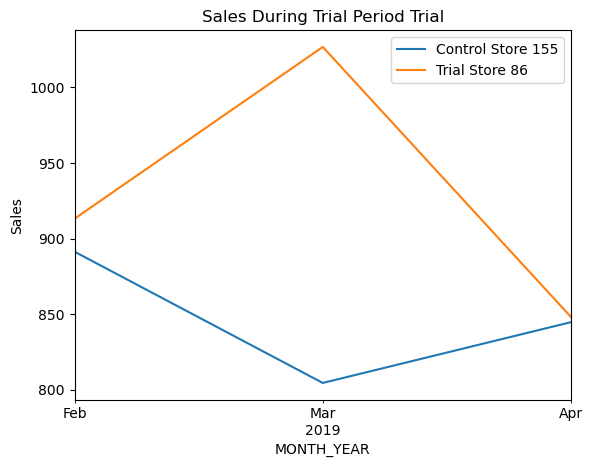

In [362]:
grouped155["TOT_SALES"].sum().plot(label="Control Store 155")
grouped86["TOT_SALES"].sum().plot(label = "Trial Store 86")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales During Trial Period Trial")
plt.show()

|  Store 86 | Totals   |
|---------- |----------|
|TOT_SALES  |   2788.2 |
|PROD_QTY   |   815.0  |
|REPEAT CST |   123    |
|Total  CST |   215    |

| Store 155 |          |
|-----------|----------|
|TOT_SALES  |   2540.2 |
|PROD_QTY   |   736.0  |
|REPEAT CST |   111    |
|Total CST  |   190    |

For for the second pair we can see a clear difference between the trial store and the control store. Every category is higher from total sales to quantity sold, repeat customers and number of customers. 

The monthly sales shows a substantial increase and then a drop for the month of April for the trial store. While the control store declined from February to March and had an increase in April.  

The repeat customer difference is about 1.2% between the trial and control store. The control store has more repeat customers but by very little. 

Lets look at the next pair of stores

##### Trial Store 88 and Control Store 237:

In [363]:
tstore_88[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    4286.8
PROD_QTY      972.0
dtype: float64

In [364]:
cstore_237[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    3817.6
PROD_QTY      860.0
dtype: float64

In [365]:
tstore_88["LYLTY_CARD_NBR"].value_counts()

88313.0    6
88231.0    5
88352.0    4
88017.0    4
88012.0    4
          ..
88247.0    1
88236.0    1
88032.0    1
88359.0    1
88126.0    1
Name: LYLTY_CARD_NBR, Length: 261, dtype: int64

In [374]:
#store 88 has 145 repeat customers 
repeat_customers_88 =  tstore_88["LYLTY_CARD_NBR"].value_counts()

repeat_customers_88.iloc[:146]


88313.0    6
88231.0    5
88352.0    4
88017.0    4
88012.0    4
          ..
88113.0    2
88380.0    2
88279.0    2
88288.0    2
88280.0    1
Name: LYLTY_CARD_NBR, Length: 146, dtype: int64

In [377]:
cstore_237["LYLTY_CARD_NBR"].value_counts()

237366.0    6
237182.0    5
237038.0    5
237325.0    5
237170.0    4
           ..
237250.0    1
237031.0    1
237033.0    1
237174.0    1
237272.0    1
Name: LYLTY_CARD_NBR, Length: 262, dtype: int64

In [381]:
#store 237 has 109 repeat customers 
repeat_customers_237 = cstore_237["LYLTY_CARD_NBR"].value_counts()

repeat_customers_237.iloc[:110]

237366.0    6
237182.0    5
237038.0    5
237325.0    5
237170.0    4
           ..
237067.0    2
237333.0    2
237347.0    2
237168.0    2
237379.0    1
Name: LYLTY_CARD_NBR, Length: 110, dtype: int64

In [383]:
#grouping stores by month 
grouped88 = tstore_88.groupby('MONTH_YEAR')
grouped237 = cstore_237.groupby('MONTH_YEAR')

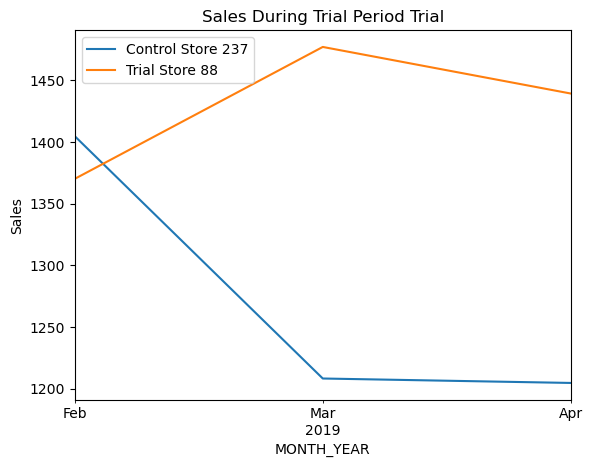

In [434]:
grouped237["TOT_SALES"].sum().plot(label="Control Store 237")
grouped88["TOT_SALES"].sum().plot(label = "Trial Store 88")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales During Trial Period Trial")
plt.show()

|  Store 88 | Totals   |
|---------- |----------|
|TOT_SALES  |   4286.8 |
|PROD_QTY   |   972    |
|REPEAT CST |   145    |
|Total  CST |   261    |

| Store 237 |          |
|-----------|----------|
|TOT_SALES  |   3817.6 |
|PROD_QTY   |   860    |
|REPEAT CST |   109    |
|Total CST  |   262    |

For for the third pair we can see a clear difference between the trial store and the control store. Every category is higher from total sales to quantity sold, repeat customers and number of customers. 

The monthly sales shows a substantial increase and then a slight drop for the month of April for the trial store. While the control store declined from February to March and had an very slight decrease in April.  

It seems that the trial store is outperforming the control store. 

#### Lets visualize the Product Qty sold during this period for each group. 

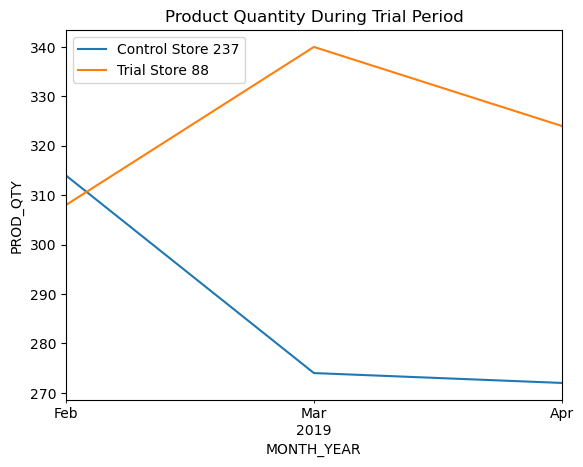

In [429]:
grouped237["PROD_QTY"].sum().plot(label="Control Store 237")
grouped88["PROD_QTY"].sum().plot(label = "Trial Store 88")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity During Trial Period")
plt.show()

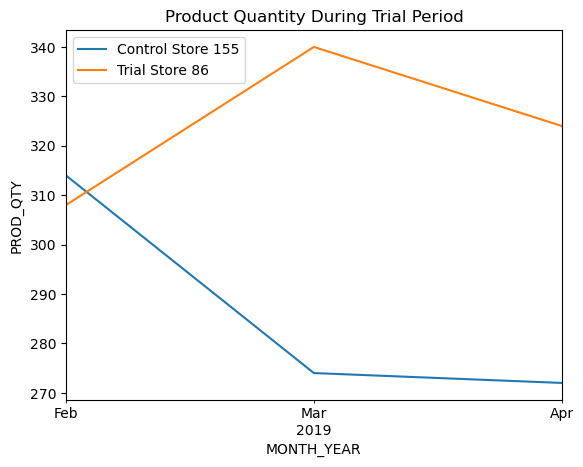

In [430]:
grouped155["PROD_QTY"].sum().plot(label="Control Store 155")
grouped86["PROD_QTY"].sum().plot(label = "Trial Store 86")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity During Trial Period")
plt.show()

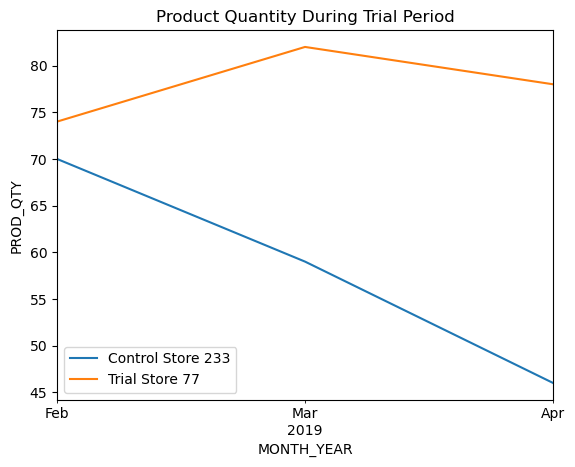

In [432]:
grouped233["PROD_QTY"].sum().plot(label="Control Store 233")
grouped77["PROD_QTY"].sum().plot(label = "Trial Store 77")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity During Trial Period")
plt.show()

As we can see by the graphs above the trial stores outperformed the control stores every month by quantity sold. 

#### Lets see how they stack up with average transactions per customers. 

In [402]:
grouped88["LYLTY_CARD_NBR"].value_counts().mean()

1.2590673575129534

In [403]:
grouped237["LYLTY_CARD_NBR"].value_counts().mean()

1.178082191780822

In [404]:
grouped86["LYLTY_CARD_NBR"].value_counts().mean()

1.2590673575129534

In [407]:
grouped155["LYLTY_CARD_NBR"].value_counts().mean()

1.178082191780822

In [409]:
grouped77["LYLTY_CARD_NBR"].value_counts().mean()

1.0422535211267605

In [410]:
grouped233["LYLTY_CARD_NBR"].value_counts().mean()

1.0521739130434782

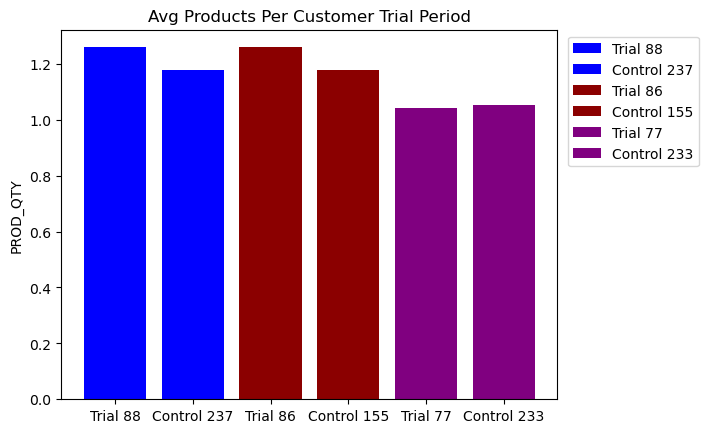

In [426]:
groups = ["Trial 88", "Control 237"]
group2 = ["Trial 86", "Control 155"]
group3 = ["Trial 77", "Control 233"]
values_grp_1 = [1.259,1.178]
values_grp_2 = [1.259,1.178]
values_grp_3 = [1.042,1.052]

plt.bar(groups, values_grp_1, label = groups, color = 'blue')
plt.bar(group2, values_grp_2, label = group2, color = 'darkred')
plt.bar(group3, values_grp_3, label = group3, color = 'purple')
plt.ylabel("PROD_QTY")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.title("Avg Products Per Customer Trial Period")
plt.show()

As we can see the average transactions were slightly higher for 2 of the 3 trial stores. 

To conclude: 

I believe the new layout is working to increase sales. 

Comparing the trial stores to control stores: 

Sales, products sold, amount of repeat customers, and average transactions per customer all show signs thats the trial stores are outperforming the control stores during this period. 

My recommendation would be to increase the amount of trial stores and to run another analysis in 3 months to see if the increased sales stay true and stablize at a higher point. 



In [435]:
chips_final.to_csv("chips_final.csv")